In [11]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

In [12]:
secretnumber = '1010'
n =  len(secretnumber)

In [13]:
circuit = QuantumCircuit(n+1, n)

circuit.h(range(n))
circuit.x(n)
circuit.h(n)
circuit.barrier()

for i,yesno in enumerate(reversed(secretnumber)):
    if (yesno == '1'):
        circuit.cx(i,n)

circuit.barrier()
circuit.h(range(n))
circuit.measure(range(n),range(n))

In [18]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1).result()
counts = result.get_counts()
print(counts)

{'1010': 1}


In [15]:
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_santiago')
job = execute(circuit, backend=qcomp)
from qiskit.tools.monitor import job_monitor
job_monitor(job)

ibmqfactory.load_account:WARNING:2021-07-17 16:26:06,923: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run


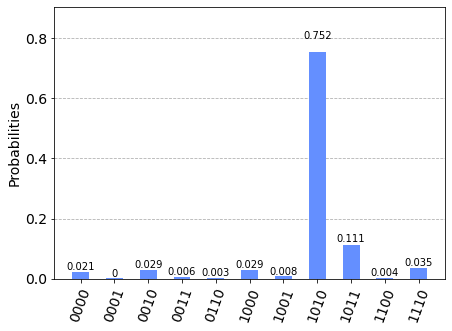

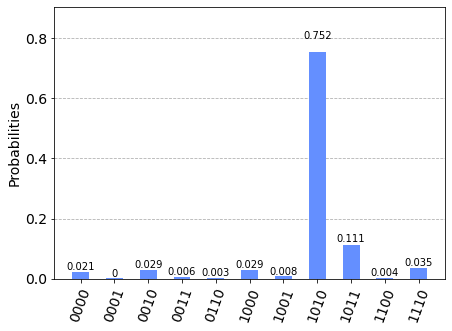

In [16]:
from qiskit.tools.visualization import plot_histogram
result = job.result()
plot_histogram(result.get_counts(circuit))